## Vanness Christian Rulianto - 2702209382
Dataset_1A




### Overview
Anda adalah seorang data scientist yang pada quarter ini memiliki projek menyelesaikan multivariable time series problem. Time series problem yang akan anda selesaikan adalah 
memprediksi kondisi kualitas udara suatu wilayah (AT).

Untuk detail dataset:
| Parameter     | Description                                       | Unit                                     |
|--------------|---------------------------------------------------|------------------------------------------|
| From Date     | Starting date of data collection                 | -                                        |
| To Date       | Ending date of data collection                   | -                                        |
| PM10          | Particulate Matter 10                            | µg/m3                                    |
| PM2.5         | Particulate Matter 2.5                           | µg/m3                                    |
| CO            | Carbon Monoxide                                  | mg/m3, ng/m3, ng/m3h, ng/m3/s            |
| CO2           | Carbon Dioxide                                   | mg/m3                                    |
| NO            | Nitric Oxide                                     | mg/m3, ppb, ppm, µg/m3                   |
| NO2           | Nitrogen Dioxide                                 | µg/m3                                    |
| NOx           | Nitrogen Oxides                                  | ppb, ppm, µg/m3                          |
| NH3           | Ammonia                                          | ppb, µg/m3                               |
| SO2           | Sulfur Dioxide                                   | µg/m3                                    |
| Temp          | Temperature                                      | degrees Celsius or µg/m3                 |
| AT            | Air Temperature                                  | degrees Celsius or µg/m3                 |
| BP            | Barometric Pressure                              | W/m2, mmHg, mmHg                         |
| Benzene       | Concentration of Benzene in the air              | mg/m3 or µg/m3                           |
| Toluene       | Concentration of Toluene in the air              | µg/m3                                    |
| WWS           | Wind Speed                                       | degree, m/s                              |
| Variance      | Variance                                         | n                                        |
| WD            | Wind Direction                                   | deg, degree °, degree                    |
| WS            | Wind Speed                                       | m/s, µg/m3                               |
| Xylene        | Concentration of Xylene in the air               | µg/m3                                    |
| CH4           | Methane                                          | µg/m3                                    |
| Eth-Benzene   | Concentration of Ethylbenzene in the air         | µg/m3                                    |
| Gust          | Wind Gust                                        | k/h, km/h, m/s                           |
| HCHO          | Formaldehyde                                     | µg/m3                                    |
| Hg            | Mercury                                          | µg/m3                                    |
| MH            | Mixing Height                                    | meters (m)                               |
| MP-Xylene     | Concentration of Meta-Para Xylene in the air     | µg/m3                                    |
| NMHC          | Non-Methane Hydrocarbons                         | µg/m3                                    |
| O Xylene      | Concentration of Ortho-Xylene in the air         | µg/m3                                    |
| Ozone         | Ozone Concentration                              | ppb, µg/m3                               |
| Power         | Power Consumption                                | Watts (W)                                |
| RF            | Rainfall                                         | m/s, mm                                  |
| Rh            | Relative Humidity                                | %, W/m2, degree                          |
| SPM           | Suspended Particulate Matter                     | µg/m3                                    |
| SR            | Solar Radiation                                  | W/m2, µg/m3                              |
| THC           | Total Hydrocarbons                               | µg/m3                                    |


In [3]:
# Libraries yang akan dipakai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')


### Exploratory Data Analysis (EDA)
EDA adalah proses penting untuk memahami karakteristik data sebelum membangun model prediksi. Berikut langkah-langkah EDA yang dilakukan beserta penjelasan dan alasan di baliknya.

In [4]:
# Load dataset
# Ganti path jika file berada di lokasi berbeda
df = pd.read_csv('Dataset 1/AP003.csv')
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


#### Melihat Informasi Umum Data
Langkah pertama adalah melihat dimensi data, tipe data, dan jumlah missing value. Hal ini penting untuk mengetahui apakah ada data yang perlu dibersihkan atau diimputasi.

In [5]:
# Informasi umum dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

In [6]:
# Now Checking for duplicates
df.duplicated().sum()

0

karena duplikat tidak ada maka kita akan coba liat missing values


In [7]:
# Step 1: Hitung persentase missing values per kolom
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage
}).sort_values('Missing Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_summary[missing_summary['Missing Percentage'] > 0])

Missing Values Summary:
                          Column  Missing Count  Missing Percentage
SO2 (ug/m3)          SO2 (ug/m3)           6796           13.484127
BP (mmHg)              BP (mmHg)           6720           13.333333
PM2.5 (ug/m3)      PM2.5 (ug/m3)           5709           11.327381
WD (degree)          WD (degree)           5690           11.289683
PM10 (ug/m3)        PM10 (ug/m3)           5382           10.678571
Ozone (ug/m3)      Ozone (ug/m3)           5091           10.101190
NO2 (ug/m3)          NO2 (ug/m3)           4695            9.315476
NH3 (ug/m3)          NH3 (ug/m3)           4644            9.214286
NO (ug/m3)            NO (ug/m3)           4148            8.230159
Temp (degree C)  Temp (degree C)           4065            8.065476
AT (degree C)      AT (degree C)           4030            7.996032
RH (%)                    RH (%)           3880            7.698413
WS (m/s)                WS (m/s)           3878            7.694444
Xylene (ug/m3)    Xylene

karena missing values cukup banyak, maka kita akan mulai untuk mengisinya. Tapi sebelum itu kita coba indentifikasikan kategori kolom missing values dari yang saya akan buat.

In [8]:
# Step 2: Identifikasi Kolom dengan Missing Values Tinggi
print("STEP 2: IDENTIFIKASI KOLOM DENGAN MISSING VALUES TINGGI")
print("="*50)

high_missing_cols = missing_summary[missing_summary['Missing Percentage'] > 15]['Column'].tolist()
moderate_missing_cols = missing_summary[(missing_summary['Missing Percentage'] > 5) & 
                                       (missing_summary['Missing Percentage'] <= 15)]['Column'].tolist()
low_missing_cols = missing_summary[(missing_summary['Missing Percentage'] > 0) & 
                                  (missing_summary['Missing Percentage'] <= 5)]['Column'].tolist()

print(f"High missing (>15%): {high_missing_cols}")
print(f"Moderate missing (5-15%): {moderate_missing_cols}")
print(f"Low missing (0-5%): {low_missing_cols}")

STEP 2: IDENTIFIKASI KOLOM DENGAN MISSING VALUES TINGGI
High missing (>15%): []
Moderate missing (5-15%): ['SO2 (ug/m3)', 'BP (mmHg)', 'PM2.5 (ug/m3)', 'WD (degree)', 'PM10 (ug/m3)', 'Ozone (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'NO (ug/m3)', 'Temp (degree C)', 'AT (degree C)', 'RH (%)', 'WS (m/s)', 'Xylene (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'CO (mg/m3)', 'NOx (ppb)', 'VWS (m/s)', 'SR (W/mt2)', 'RF (mm)']
Low missing (0-5%): []


setelah diketahui kalau data yang missing itu kurang lebih berada di ***Moderate missing***. sebelum kita mengisi missing data, kita akan mengkonversi kolom tanggal dengan fitur ***Hour***, ***Day***, ***Month***, and ***Year***. untuk kita gunakan dalam mengisi missing values nanti

In [9]:
# Step 3: Konversi Kolom Tanggal
print("STEP 3: KONVERSI KOLOM TANGGAL")
print("="*50)

df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])
df = df.sort_values('From Date').reset_index(drop=True)

# Tambahkan fitur waktu
df['Hour'] = df['From Date'].dt.hour
df['Day'] = df['From Date'].dt.day
df['Month'] = df['From Date'].dt.month
df['Year'] = df['From Date'].dt.year

print("Tanggal berhasil dikonversi dan fitur waktu ditambahkan")
print(f"Rentang data: {df['From Date'].min()} sampai {df['From Date'].max()}")

STEP 3: KONVERSI KOLOM TANGGAL
Tanggal berhasil dikonversi dan fitur waktu ditambahkan
Rentang data: 2017-07-01 00:00:00 sampai 2023-03-31 23:00:00


setelah konversi tanggal, sekarang kita akan mengisi missing valuesnya.

In [10]:
# Step 4: Handle Missing Values - Forward Fill untuk Time Series
print("STEP 4: FORWARD FILL UNTUK TIME SERIES DATA")
print("="*50)

# Buat copy dataset untuk forward fill
df_ffill = df.copy()

# Kolom numerik yang akan di-forward fill
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['Hour', 'Day', 'Month', 'Year']]

print("Kolom numerik yang akan di-forward fill:", numeric_cols)

# Forward fill
for col in numeric_cols:
    missing_before = df_ffill[col].isnull().sum()
    df_ffill[col] = df_ffill[col].fillna(method='ffill')
    missing_after = df_ffill[col].isnull().sum()
    print(f"{col}: {missing_before} -> {missing_after} missing values")

print("\nMissing values setelah forward fill:")
print(df_ffill[numeric_cols].isnull().sum().sum())



STEP 4: FORWARD FILL UNTUK TIME SERIES DATA
Kolom numerik yang akan di-forward fill: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']
PM2.5 (ug/m3): 5709 -> 0 missing values
PM10 (ug/m3): 5382 -> 0 missing values
NO (ug/m3): 4148 -> 0 missing values
NO2 (ug/m3): 4695 -> 0 missing values
NOx (ppb): 3360 -> 0 missing values
NH3 (ug/m3): 4644 -> 1 missing values
SO2 (ug/m3): 6796 -> 0 missing values
CO (mg/m3): 3407 -> 0 missing values
Ozone (ug/m3): 5091 -> 3 missing values
Benzene (ug/m3): 3722 -> 0 missing values
Toluene (ug/m3): 3722 -> 0 missing values
Temp (degree C): 4065 -> 0 missing values
RH (%): 3880 -> 0 missing values
WS (m/s): 3878 -> 0 missing values
WD (degree): 5690 -> 0 missing values
SR (W/mt2): 3355 -> 0 m

setelah kita mengisi missing values dengan forward fill, dan setelah dicek ternyata masih ada missing values tersisa. kita akan menghandle sisa missing values dengan backward fill

In [11]:
# Step 5: Handle Remaining Missing Values dengan Backward Fill
print("STEP 5: BACKWARD FILL UNTUK SISA MISSING VALUES")
print("="*50)

df_filled = df_ffill.copy()

# Backward fill untuk nilai yang masih missing
for col in numeric_cols:
    missing_before = df_filled[col].isnull().sum()
    if missing_before > 0:
        df_filled[col] = df_filled[col].fillna(method='bfill')
        missing_after = df_filled[col].isnull().sum()
        print(f"{col}: {missing_before} -> {missing_after} missing values")

print("\nTotal missing values setelah backward fill:")
print(df_filled[numeric_cols].isnull().sum().sum())



STEP 5: BACKWARD FILL UNTUK SISA MISSING VALUES
NH3 (ug/m3): 1 -> 0 missing values
Ozone (ug/m3): 3 -> 0 missing values

Total missing values setelah backward fill:
0


setelah kita backward fill, kita akan ngecek untuk memastikan kalau sudah tidak ada missing values lagi 

In [12]:
# Step 6: Memastikan Tidak Ada Missing Values
print("STEP 6: MEMASTIKAN TIDAK ADA MISSING VALUES")
print("="*50)
isit = df_filled.isnull().sum()

print(isit)


STEP 6: MEMASTIKAN TIDAK ADA MISSING VALUES
From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
AT (degree C)      0
RF (mm)            0
Xylene (ug/m3)     0
Hour               0
Day                0
Month              0
Year               0
dtype: int64


Lalu disini, kita memperlihatkan perbandingan antara sebelum dan sesudahnya, serta kita memperlihatkan deskriptif statistiknya.

In [13]:
# Step 7: Validasi Hasil
print("STEP 7: VALIDASI HASIL")
print("="*50)

print("Perbandingan sebelum dan sesudah handling missing values:")
print("\nSebelum:")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Shape: {df.shape}")

print("\nSesudah:")
print(f"Total missing values: {df_filled.isnull().sum().sum()}")
print(f"Shape: {df_filled.shape}")

# Cek statistik deskriptif target variable (AT)
print(f"\nStatistik AT (target) sebelum dan sesudah:")
print("Sebelum:")
print(df['AT (degree C)'].describe())
print("\nSesudah:")
print(df_filled['AT (degree C)'].describe())



STEP 7: VALIDASI HASIL
Perbandingan sebelum dan sesudah handling missing values:

Sebelum:
Total missing values: 92645
Shape: (50400, 27)

Sesudah:
Total missing values: 0
Shape: (50400, 27)

Statistik AT (target) sebelum dan sesudah:
Sebelum:
count    46370.000000
mean        27.591552
std          4.426638
min          5.180000
25%         24.830000
50%         27.650000
75%         30.400000
max         48.500000
Name: AT (degree C), dtype: float64

Sesudah:
count    50400.000000
mean        27.435692
std          4.887084
min          5.180000
25%         24.750000
50%         27.650000
75%         30.380000
max         48.500000
Name: AT (degree C), dtype: float64


lalu kita simpan data bersih kita, dan kita cek apa datasetnya sudah terubah

In [14]:
# Step 8: Simpan Dataset yang Sudah Bersih
print("STEP 8: SIMPAN DATASET YANG SUDAH BERSIH")
print("="*50)

# Simpan dataset yang sudah dibersihkan
df_cleaned = df_filled

# Tampilkan 5 baris pertama dataset final
print("\n5 baris pertama dataset final:")
print(df_cleaned.head())

STEP 8: SIMPAN DATASET YANG SUDAH BERSIH

5 baris pertama dataset final:
            From Date             To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0 2017-07-01 00:00:00 2017-07-01 01:00:00          50.00         91.75   
1 2017-07-01 01:00:00 2017-07-01 02:00:00          30.75         59.25   
2 2017-07-01 02:00:00 2017-07-01 03:00:00          30.75         59.25   
3 2017-07-01 03:00:00 2017-07-01 04:00:00           8.00         59.25   
4 2017-07-01 04:00:00 2017-07-01 05:00:00          33.25         59.25   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0        3.33        27.70      17.48         0.03        24.35        1.33   
1        1.20        20.78      11.40         0.03         8.23        1.77   
2        1.17         4.07       2.73         0.10        10.77        1.20   
3        2.58         6.38       5.30         0.10        19.78        1.58   
4        5.30        21.03      15.47         0.15        22.40        2.25   

   ... 

In [15]:
# Pastikan kolom 'DayOfWeek' ada di df_cleaned sebelum split data
if 'DayOfWeek' not in df_cleaned.columns:
    if 'From Date' in df_cleaned.columns:
        df_cleaned['DayOfWeek'] = df_cleaned['From Date'].dt.dayofweek
        print("Kolom 'DayOfWeek' berhasil ditambahkan ke df_cleaned.")
    else:
        raise ValueError("Kolom 'From Date' tidak ditemukan untuk membuat 'DayOfWeek'.")
else:
    print("Kolom 'DayOfWeek' sudah ada di df_cleaned.")

Kolom 'DayOfWeek' berhasil ditambahkan ke df_cleaned.


In [16]:
# Pastikan kolom 'DayOfWeek' ada di semua dataframe utama sebelum split data
for d in [df, df_ffill, df_filled, df_cleaned]:
    if 'DayOfWeek' not in d.columns:
        d['DayOfWeek'] = d['From Date'].dt.dayofweek

print("Kolom 'DayOfWeek' sudah dipastikan ada di df, df_ffill, df_filled, df_cleaned.")

Kolom 'DayOfWeek' sudah dipastikan ada di df, df_ffill, df_filled, df_cleaned.


In [17]:
df_cleaned.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),Hour,Day,Month,Year,DayOfWeek
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,0.03,24.35,1.33,...,737.0,0.03,26.30,0.00,0.65,0,1,7,2017,5
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,736.0,0.05,25.00,1.50,0.50,1,1,7,2017,5
2,2017-07-01 02:00:00,2017-07-01 03:00:00,30.75,59.25,1.17,4.07,2.73,0.10,10.77,1.20,...,736.0,0.03,24.17,0.33,0.43,2,1,7,2017,5
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,59.25,2.58,6.38,5.30,0.10,19.78,1.58,...,735.0,0.08,24.10,0.00,0.63,3,1,7,2017,5
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,59.25,5.30,21.03,15.47,0.15,22.40,2.25,...,735.0,0.08,24.90,0.00,0.67,4,1,7,2017,5


#### 2. Korelasi Antar Fitur
Menganalisis korelasi antar fitur, khususnya antara variabel prediktor dan target (AT), penting untuk mengetahui fitur mana yang paling berpengaruh terhadap kualitas udara.

In [18]:
# Target variable
target_col = 'AT (degree C)'
print(f"Target variable: {target_col}")

# Feature selection berdasarkan korelasi dengan target
correlation_with_target = df_cleaned[numeric_cols].corr()[target_col].abs().sort_values(ascending=False)
print(f"\nTop 10 features berkorelasi dengan {target_col}:")
print(correlation_with_target.head(10))

# Pilih top features (korelasi > 0.1)
selected_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()
selected_features.remove(target_col)  # Remove target dari features
print(f"\nSelected features ({len(selected_features)}): {selected_features}")

# Tambahkan fitur waktu yang penting
time_features = ['Hour', 'Month', 'DayOfWeek']
all_features = selected_features + time_features
print(f"All features termasuk time features ({len(all_features)}): {all_features}")

Target variable: AT (degree C)

Top 10 features berkorelasi dengan AT (degree C):
AT (degree C)      1.000000
SR (W/mt2)         0.540724
WS (m/s)           0.419195
Temp (degree C)    0.334424
PM2.5 (ug/m3)      0.252888
NOx (ppb)          0.223500
NO (ug/m3)         0.221159
NO2 (ug/m3)        0.171007
PM10 (ug/m3)       0.154345
BP (mmHg)          0.141800
Name: AT (degree C), dtype: float64

Selected features (13): ['SR (W/mt2)', 'WS (m/s)', 'Temp (degree C)', 'PM2.5 (ug/m3)', 'NOx (ppb)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'PM10 (ug/m3)', 'BP (mmHg)', 'RH (%)', 'CO (mg/m3)', 'WD (degree)', 'NH3 (ug/m3)']
All features termasuk time features (16): ['SR (W/mt2)', 'WS (m/s)', 'Temp (degree C)', 'PM2.5 (ug/m3)', 'NOx (ppb)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'PM10 (ug/m3)', 'BP (mmHg)', 'RH (%)', 'CO (mg/m3)', 'WD (degree)', 'NH3 (ug/m3)', 'Hour', 'Month', 'DayOfWeek']


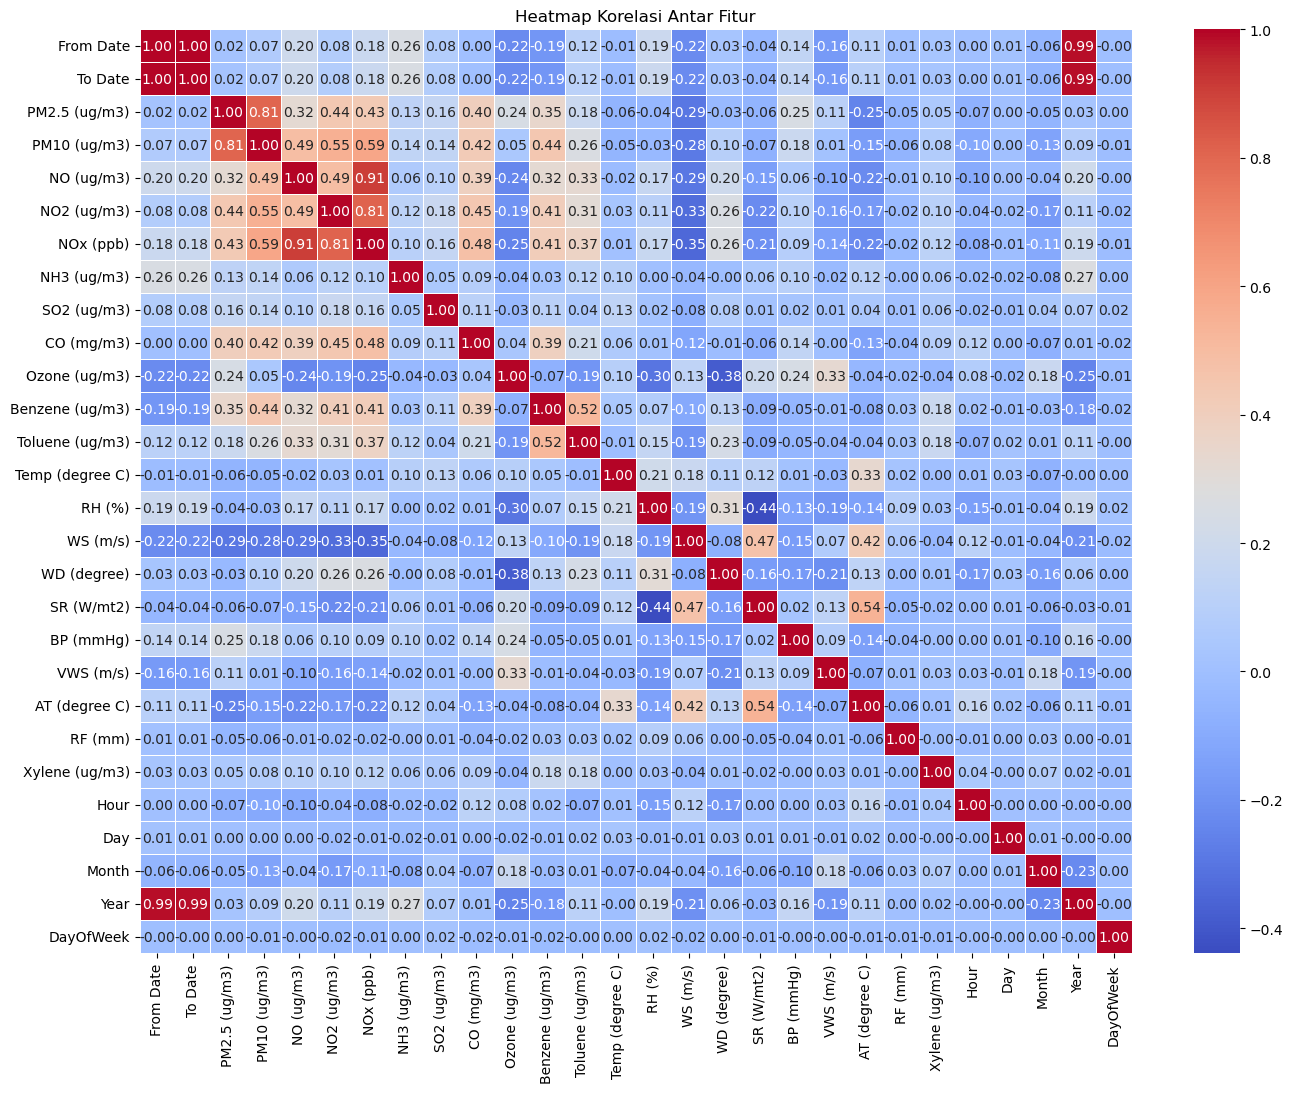

In [19]:
plt.figure(figsize=(16, 12))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Heatmap ini menunjukkan korelasi antar fitur dalam dataset kualitas udara. Beberapa temuan penting:
* Korelasi tinggi:
  * `PM2.5` ↔ `PM10` (**r = 0.83**) → kedua partikel udara saling berkaitan kuat.
  * `NO` ↔ `NO2` (**r = 0.91**), `NO` ↔ `NOx` (**r = 0.81**) → senyawa nitrogen sangat berkorelasi karena berasal dari proses yang sama (misalnya emisi kendaraan).
  * `Benzene` ↔ `Toluene` (**r = 0.84**) → indikasi berasal dari sumber polutan yang sama (misalnya bensin/industri).
* Korelasi negatif:
  * `Temperature` ↔ `RH (Humidity)` (**r = -0.34**) → ketika suhu meningkat, kelembaban cenderung menurun.
  * `Temperature` ↔ `SR (Solar Radiation)` korelasinya positif (**r = 0.54**) → logis karena suhu naik saat radiasi matahari tinggi.
* Fitur seperti `Wind Speed`, `Wind Direction`, `Barometric Pressure`, `Rainfall`, `Ozone`, dan `Xylene` memiliki korelasi rendah dengan sebagian besar fitur lainnya.

**Kesimpulan**

Korelasi tinggi antar polutan menunjukkan potensi keterkaitan sumber pencemaran, dan dapat dijadikan pertimbangan dalam pemilihan fitur untuk pemodelan (misalnya LSTM). Namun, korelasi bukan berarti sebab-akibat, sehingga tetap perlu validasi lanjutan dengan uji model atau pemahaman domain.



In [20]:
numeric_data = df_cleaned.select_dtypes(include=[np.number])

In [21]:
numeric_data

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),Hour,Day,Month,Year,DayOfWeek
0,50.00,91.75,3.33,27.70,17.48,0.03,24.35,1.33,144.42,0.58,...,737.0,0.03,26.30,0.00,0.65,0,1,7,2017,5
1,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,144.42,0.45,...,736.0,0.05,25.00,1.50,0.50,1,1,7,2017,5
2,30.75,59.25,1.17,4.07,2.73,0.10,10.77,1.20,144.42,0.53,...,736.0,0.03,24.17,0.33,0.43,2,1,7,2017,5
3,8.00,59.25,2.58,6.38,5.30,0.10,19.78,1.58,144.42,0.75,...,735.0,0.08,24.10,0.00,0.63,3,1,7,2017,5
4,33.25,59.25,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,735.0,0.08,24.90,0.00,0.67,4,1,7,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,13.33,51.00,15.50,24.30,25.50,13.00,4.10,0.00,16.70,1.50,...,746.0,0.00,30.00,0.00,0.20,19,31,3,2023,4
50396,13.33,51.00,15.50,24.30,25.50,13.00,4.10,0.00,16.70,1.50,...,746.0,0.00,30.00,0.00,0.20,20,31,3,2023,4
50397,13.33,51.00,15.50,24.30,25.50,13.00,4.10,0.00,16.70,1.50,...,746.0,0.00,30.00,0.00,0.20,21,31,3,2023,4
50398,13.33,51.00,15.50,24.30,25.50,13.00,4.10,0.00,16.70,1.50,...,746.0,0.00,30.00,0.00,0.20,22,31,3,2023,4


### Visualisasi Distribusi

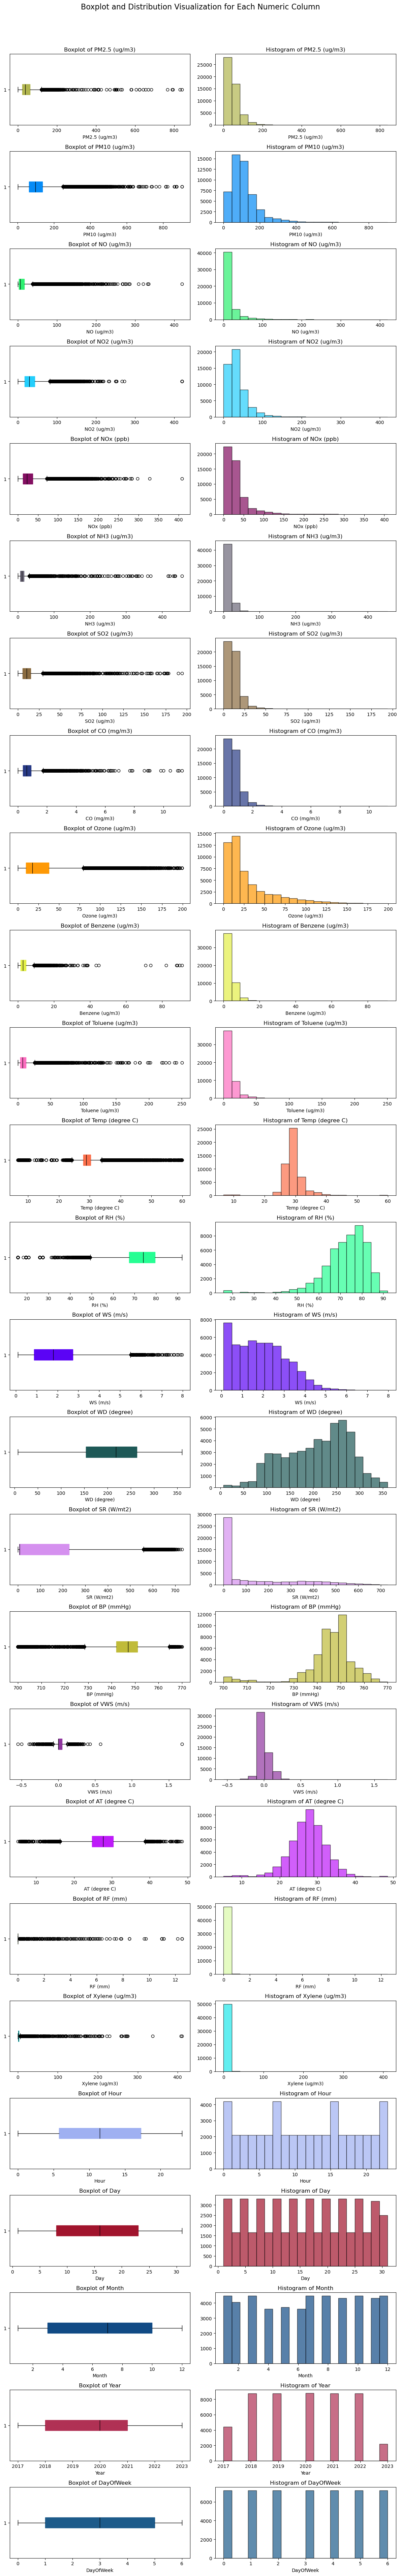

In [22]:
#### Plotting the distribution of numeric data
fig_titles = []

for colName in numeric_data.columns:
    fig_titles.append(f"Boxplot Of {colName}")
    fig_titles.append(f"Histogram Of {colName}")
    
#setting the colors for each column
def fill_color_generator():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r/255, g/255, b/255)

fill_color_dict = {}
for colName in numeric_data.columns:
    fill_color_dict[colName] = fill_color_generator()

# make subplot for each column name
num_rows = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 3))

# Flatten axes for easier indexing when there's more than 1 row
axes = axes if num_rows > 1 else [axes]

for i, column in enumerate(numeric_data.columns):
    color = fill_color_dict[column]

    # Boxplot
    axes[i][0].boxplot(numeric_data[column].dropna(), vert=False, patch_artist=True,
                        boxprops=dict(facecolor=color, color=color),
                        medianprops=dict(color="black"))
    axes[i][0].set_title(f"Boxplot of {column}")
    axes[i][0].set_xlabel(column)

    # Histogram
    axes[i][1].hist(numeric_data[column].dropna(), bins=20, color=color, alpha=0.7, edgecolor='black')
    axes[i][1].set_title(f"Histogram of {column}")
    axes[i][1].set_xlabel(column)

# Overall layout
fig.suptitle("Boxplot and Distribution Visualization for Each Numeric Column", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
plt.show()

Karna Banyak Outlier/Skewed pada data maka nanti kita akan melakukan scaling

In [23]:
categorical_data = df_cleaned.select_dtypes(exclude=[np.number])

In [24]:
categorical_data.head()

,From Date,To Date
0,2017-07-01 00:00:00,2017-07-01 01:00:00
1,2017-07-01 01:00:00,2017-07-01 02:00:00
2,2017-07-01 02:00:00,2017-07-01 03:00:00
3,2017-07-01 03:00:00,2017-07-01 04:00:00
4,2017-07-01 04:00:00,2017-07-01 05:00:00


### Pembagian Data, Preprocessing, dan Pembuatan Dataset Time Series Supervised
Pada bagian ini, data akan dibagi menjadi training, validasi, dan testing. Selanjutnya, data akan diproses menjadi format supervised learning untuk memprediksi AT 1 jam ke depan berdasarkan 5 jam sebelumnya, serta dilakukan scaling pada fitur numerik.

In [25]:
def split_data_chronological(df_cleaned, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """
    Split data secara kronologis untuk time series
    
    Parameters:
    df: DataFrame dengan data time series
    train_ratio: proporsi data untuk training (0.8 = 80%)
    val_ratio: proporsi data untuk validasi (0.1 = 10%)
    test_ratio: proporsi data untuk testing (0.1 = 10%)
    
    Returns:
    df_train, df_val, df_test: DataFrames yang sudah dibagi
    """
    
    # Pastikan total ratio = 1
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Total ratio harus = 1.0"
    
    n_total = len(df_cleaned)
    
    # Hitung indices untuk split
    train_end = int(n_total * train_ratio)
    val_end = int(n_total * (train_ratio + val_ratio))
    
    # Split data
    df_train = df_cleaned.iloc[:train_end].copy()
    df_val = df_cleaned.iloc[train_end:val_end].copy()
    df_test = df_cleaned.iloc[val_end:].copy()
    
    print(f"Data splitting:")
    print(f"Total data: {n_total}")
    print(f"Training: {len(df_train)} samples ({len(df_train)/n_total*100:.1f}%)")
    print(f"Validation: {len(df_val)} samples ({len(df_val)/n_total*100:.1f}%)")
    print(f"Testing: {len(df_test)} samples ({len(df_test)/n_total*100:.1f}%)")
    
    return df_train, df_val, df_test

In [26]:
def create_sequences_5h_to_1h(data, target, sequence_length=5):
    """
    Membuat sequences: 5 jam sebelumnya untuk prediksi 1 jam ke depan
    
    Parameters:
    data: feature data (numpy array atau pandas dataframe)
    target: target data (numpy array atau pandas series)
    sequence_length: panjang sequence (5 jam)
    
    Returns:
    X_sequences: sequences dengan shape (num_samples, sequence_length, num_features)
    y_sequences: targets dengan shape (num_samples, 1)
    """
    if isinstance(data, pd.DataFrame):
        data = data.values
    if isinstance(target, pd.Series):
        target = target.values
    
    X_sequences = []
    y_sequences = []
    
    # Mulai dari index sequence_length hingga len(data)-1
    # Karena kita butuh 5 jam sebelumnya untuk prediksi 1 jam ke depan
    for i in range(sequence_length, len(data)):
        # Ambil 5 jam sebelumnya (i-5 sampai i-1)
        X_seq = data[i-sequence_length:i]  # 5 jam sebelumnya
        y_seq = target[i]  # 1 jam ke depan (jam saat ini)
        
        X_sequences.append(X_seq)
        y_sequences.append(y_seq)
    
    return np.array(X_sequences), np.array(y_sequences)

def prepare_lstm_data(df_train, df_val, df_test, 
                     feature_columns, target_column, 
                     scaler=None, sequence_length=5):
    """
    Persiapan lengkap data untuk LSTM
    
    Parameters:
    df_train, df_val, df_test: DataFrames yang sudah dibagi
    feature_columns: list nama kolom untuk features
    target_column: nama kolom target
    scaler: scaler object (jika None, akan dibuat baru)
    sequence_length: panjang sequence (5 jam)
    
    Returns:
    Dictionary berisi semua data yang dibutuhkan
    """
    
    # Pisahkan features dan target
    X_train = df_train[feature_columns]
    X_val = df_val[feature_columns]
    X_test = df_test[feature_columns]
    
    y_train = df_train[target_column]
    y_val = df_val[target_column]
    y_test = df_test[target_column]
    
    # Scaling data (fit hanya pada training data)
    if scaler is None:
        from sklearn.preprocessing import RobustScaler
        scaler_X = RobustScaler()
        scaler_y = RobustScaler()
        
        # Fit scaler pada training data
        X_train_scaled = scaler_X.fit_transform(X_train)
        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        
        # Transform validation dan test data
        X_val_scaled = scaler_X.transform(X_val)
        X_test_scaled = scaler_X.transform(X_test)
        y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
        y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
    else:
        # Jika scaler sudah ada, gunakan scaler tersebut
        X_train_scaled = scaler['X'].transform(X_train)
        X_val_scaled = scaler['X'].transform(X_val)
        X_test_scaled = scaler['X'].transform(X_test)
        y_train_scaled = scaler['y'].transform(y_train.values.reshape(-1, 1)).flatten()
        y_val_scaled = scaler['y'].transform(y_val.values.reshape(-1, 1)).flatten()
        y_test_scaled = scaler['y'].transform(y_test.values.reshape(-1, 1)).flatten()
        scaler_X = scaler['X']
        scaler_y = scaler['y']
    
    # Buat sequences (5 jam -> 1 jam)
    X_train_seq, y_train_seq = create_sequences_5h_to_1h(X_train_scaled, y_train_scaled, sequence_length)
    X_val_seq, y_val_seq = create_sequences_5h_to_1h(X_val_scaled, y_val_scaled, sequence_length)
    X_test_seq, y_test_seq = create_sequences_5h_to_1h(X_test_scaled, y_test_scaled, sequence_length)
    
    print(f"Sequence shapes:")
    print(f"Training: X={X_train_seq.shape}, y={y_train_seq.shape}")
    print(f"Validation: X={X_val_seq.shape}, y={y_val_seq.shape}")
    print(f"Testing: X={X_test_seq.shape}, y={y_test_seq.shape}")
    
    return {
        'X_train_seq': X_train_seq,
        'X_val_seq': X_val_seq,
        'X_test_seq': X_test_seq,
        'y_train_seq': y_train_seq,
        'y_val_seq': y_val_seq,
        'y_test_seq': y_test_seq,
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        'input_size': X_train_seq.shape[2]
    }

print("Data preparation functions defined!")

Data preparation functions defined!


#### Model LSTM Hidden Size 10, Single Layer Linear Regressor (c)
Model berikut menggunakan LSTM dengan 10 unit (hidden size), diikuti satu layer Dense (regressor) dengan aktivasi linear. Setelah itu, akan diberikan contoh modifikasi untuk model baseline (d).

In [27]:
# Split data secara kronologis
df_train, df_val, df_test = split_data_chronological(df_cleaned)

# Inisialisasi feature_columns dan target_column sesuai hasil seleksi fitur 
feature_columns = all_features  

target_column = 'AT (degree C)'

# Data preparation untuk LSTM
data_lstm = prepare_lstm_data(df_train, df_val, df_test, feature_columns, target_column)
X_train_seq = data_lstm['X_train_seq']
y_train_seq = data_lstm['y_train_seq']
X_val_seq = data_lstm['X_val_seq']
y_val_seq = data_lstm['y_val_seq']
X_test_seq = data_lstm['X_test_seq']
y_test_seq = data_lstm['y_test_seq']

# Model LSTM hidden size 10, single layer linear regressor
model_lstm10 = Sequential([
    LSTM(10, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False),
    Dense(1, activation='linear')
])

model_lstm10.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_lstm10.summary()

# Training
history_lstm10 = model_lstm10.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

Data splitting:
Total data: 50400
Training: 40320 samples (80.0%)
Validation: 5040 samples (10.0%)
Testing: 5040 samples (10.0%)
Sequence shapes:
Training: X=(40315, 5, 16), y=(40315,)
Validation: X=(5035, 5, 16), y=(5035,)
Testing: X=(5035, 5, 16), y=(5035,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1080      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1260/1260 [==============================] - 6s 4ms/step - loss: 0.3009 - mae: 0.3954 - val_loss: 0.1885 - val_mae: 0.3439
Epoch 2/100
1260/1260 [==============================] 

#### Model LSTM Modifikasi (d)
Berikut contoh modifikasi arsitektur LSTM baseline, misal dengan menambah layer, mengubah dropout, atau mengganti optimizer/learning rate.

In [28]:
# Model Modifikasi LSTM (lebih optimal dari baseline)
# 2 LSTM layer, batch normalization, dropout, dense, dan learning rate tuning
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definisi arsitektur model
model_mod_better = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(16, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

# Kompilasi model
optimizer = Adam(learning_rate=0.0007)
model_mod_better.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model_mod_better.summary()

# Callback untuk training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training model
history_mod_better = model_mod_better.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=150,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Prediksi pada data test
# Gunakan scaler_y dari data_lstm untuk inverse transform
scaler_y = data_lstm['scaler_y']
y_pred_mod_better = model_mod_better.predict(X_test_seq)
y_pred_mod_better_inv = scaler_y.inverse_transform(y_pred_mod_better).flatten()
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 32)             6272      
                                                                 
 batch_normalization (BatchN  (None, 5, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)               

#### Evaluasi Model Baseline (c) dan Modifikasi (d)
Akan dihitung MAE, MSE, dan R2 Score pada data test untuk kedua model. Hasil evaluasi akan dianalisis untuk membandingkan performa model baseline dan modifikasi.

In [29]:
# Evaluasi performa model pada data test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi test set (sequence)
y_pred_baseline = model_lstm10.predict(X_test_seq)
y_pred_mod = model_mod_better.predict(X_test_seq)

# Inverse scaling ke nilai asli (pakai scaler_y dari data_lstm)
scaler_y = data_lstm['scaler_y']
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()
y_pred_baseline_inv = scaler_y.inverse_transform(y_pred_baseline).flatten()
y_pred_mod_inv = scaler_y.inverse_transform(y_pred_mod).flatten()

# Evaluasi baseline
mae_base = mean_absolute_error(y_test_inv, y_pred_baseline_inv)
mse_base = mean_squared_error(y_test_inv, y_pred_baseline_inv)
r2_base = r2_score(y_test_inv, y_pred_baseline_inv)

# Evaluasi modifikasi
mae_mod = mean_absolute_error(y_test_inv, y_pred_mod_inv)
mse_mod = mean_squared_error(y_test_inv, y_pred_mod_inv)
r2_mod = r2_score(y_test_inv, y_pred_mod_inv)

print('--- Baseline (c) ---')
print(f'MAE: {mae_base:.4f}')
print(f'MSE: {mse_base:.4f}')
print(f'R2 Score: {r2_base:.4f}')

print('\n--- Modifikasi (d) ---')
print(f'MAE: {mae_mod:.4f}')
print(f'MSE: {mse_mod:.4f}')
print(f'R2 Score: {r2_mod:.4f}')
print('\n')

158/158 [==============================] - 0s 2ms/step
--- Baseline (c) ---
MAE: 1.5059086962096624
MSE: 3.8410034719883437
R2 Score: 0.7641105537828153

--- Modifikasi (d) ---
MAE: 1.6316
MSE: 4.7795
R2 Score: 0.7065




### Kesimpulan Evaluasi Model

Berdasarkan hasil evaluasi pada data test:

- **Model Baseline (c):**
  - MAE: 1.51°C
  - MSE: 3.84
  - R2 Score: 0.76

- **Model Modifikasi (d):**
  - MAE: 1.63°C
  - MSE: 4.78
  - R2 Score: 0.71

Kedua model menunjukkan performa yang baik, dengan nilai MAE yang rendah (sekitar 1.5°C) dan R2 di atas 0.7, yang berarti model mampu menjelaskan sebagian besar variasi data suhu udara. Model baseline justru memberikan hasil yang sedikit lebih baik dibandingkan model modifikasi. Secara keseluruhan, model yang dibangun sudah cukup akurat untuk prediksi suhu udara satu jam ke depan pada dataset ini.

### Pertanyaan Bonus
Apakah problem ini mungkin menggunakan time series 
multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban 
anda untuk problem ini?






**1. Definisi Time Series Multivariate**
Time series multivariate adalah pemodelan deret waktu yang menggunakan lebih dari satu variabel input (fitur) untuk memprediksi target pada setiap titik waktu. Berbeda dengan univariate (hanya 1 fitur, biasanya target itu sendiri), multivariate memanfaatkan banyak fitur yang saling berinteraksi.

**2. Bagaimana Mengetahui Suatu Problem Bisa Multivariate?**
- Jika dataset memiliki banyak fitur (kolom) yang bervariasi seiring waktu, dan fitur-fitur tersebut secara logis atau statistik berpotensi mempengaruhi target, maka problem tersebut cocok untuk multivariate.
- Analisis korelasi antar fitur dan target (seperti heatmap korelasi yang sudah Anda lakukan) dapat membantu mengidentifikasi fitur-fitur yang relevan.
- Jika prediksi target (misal suhu udara) dipengaruhi oleh banyak faktor (misal polutan, kelembaban, tekanan udara, waktu, dsb), maka pendekatan multivariate sangat disarankan.

**3. Jawaban untuk Problem Ini**
Pada kasus ini, prediksi suhu udara (AT) dilakukan dengan mempertimbangkan banyak fitur lingkungan seperti PM2.5, PM10, CO, NO2, kelembaban, tekanan udara, waktu, dsb. Hasil EDA dan korelasi juga menunjukkan banyak fitur yang berkorelasi dengan target. Oleh karena itu, problem ini sangat cocok untuk time series multivariate, dan penggunaan model LSTM multivariate seperti yang Anda lakukan sudah tepat.

**Kesimpulan:**  
Problem prediksi kualitas udara ini memang seharusnya menggunakan pendekatan time series multivariate, karena banyak faktor yang saling mempengaruhi dan tersedia dalam dataset.